In [123]:
from skimage.io import imread
import matplotlib.pyplot as plt
from functionality import *
from PIL import Image

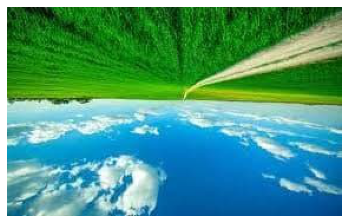

In [124]:
img = imread('test_images/test.jpg').astype(int)[...,:3]
height, width, _ = img.shape
K = np.arange(2)
n_labels = len(K)
plt.axis('off')
plt.imshow(img)

In [125]:
# smoothing coef
beta = 10
# number of rows to take as a class0(sky)
n_rows = 75

In [126]:
g = get_g(height,width,n_labels,beta)
class0_mean, class0_cov, class1_mean, class1_cov = get_gmm_params(img, n_rows)
Q = get_q(img,class0_mean, class0_cov, class1_mean, class1_cov)

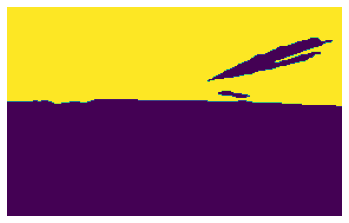

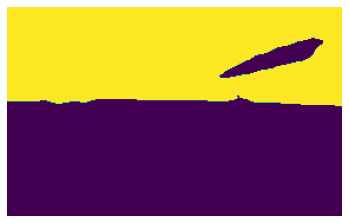

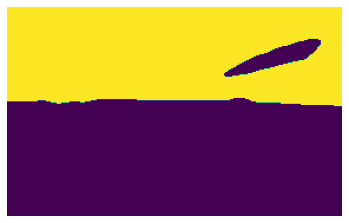

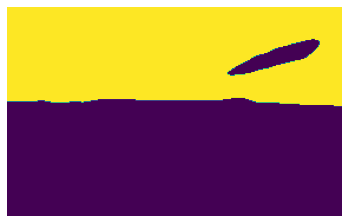

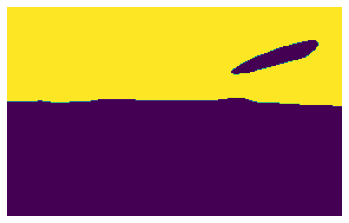

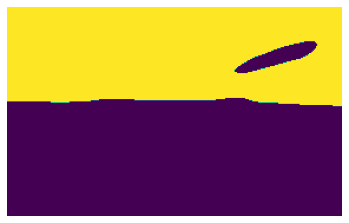

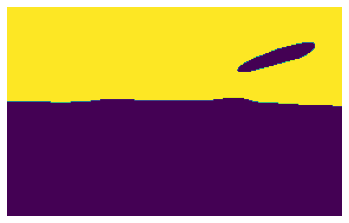

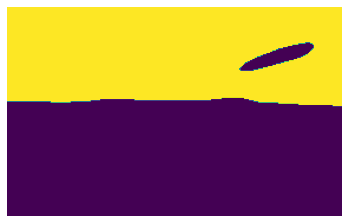

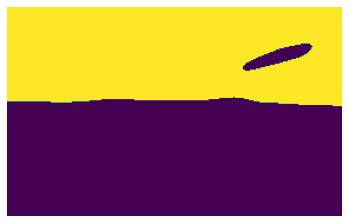

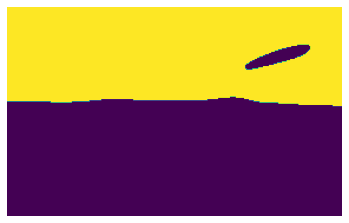

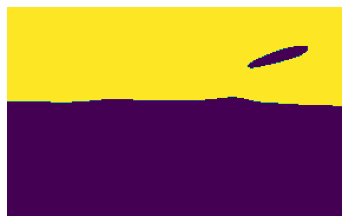

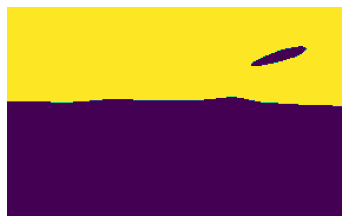

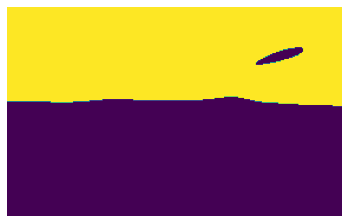

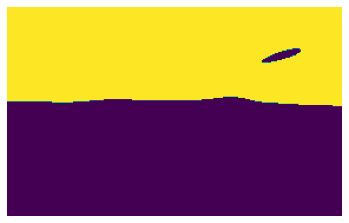

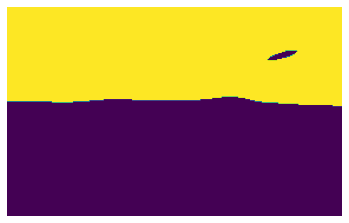

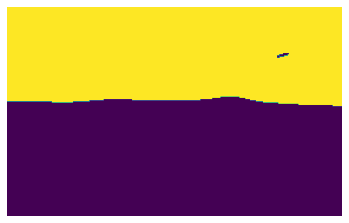

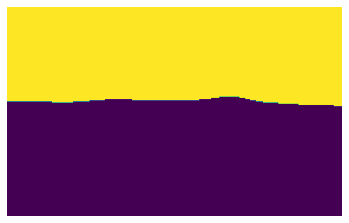

In [127]:
fi = np.zeros((height,width,4,n_labels))
for _ in range(10**3):
    fi = update_fi(height,width,fi,g,K,Q,5)
    labelling = get_labelling(height, width, g, fi)
    plt.imshow(labelling)
    plt.axis('off')
    plt.show()
    if check_smooth_border(labelling,height, width):
        break

# crossing out

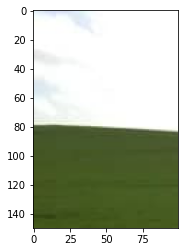

In [130]:
img = imread('test_images/img2.jpg').astype(int)[...,:3]
img = img[:150,0:100]
height, width, _ = img.shape
plt.imshow(img)

In [139]:
# smoothing coef
beta = 10
# number of rows to take as a class0(sky)
n_rows = 80

In [140]:
g = get_g(height,width,n_labels,beta)
class0_mean, class0_cov, class1_mean, class1_cov = get_gmm_params(img, n_rows)
Q = get_q(img,class0_mean, class0_cov, class1_mean, class1_cov)

In [141]:
fi = np.zeros((height,width,4,n_labels))
fi = update_fi(height,width,fi,g,K,Q,100)
labelling = get_labelling(height, width, g, fi)

In [136]:
epsilon = 0.4
q_reparametrized = get_reparametrized_q(Q, fi)
g_reparametrized, _ = get_reparametrized_g(g,fi)
q_binary = get_q_binary(q_reparametrized, epsilon)
g_binary = get_g_binary(g_reparametrized, epsilon)

In [137]:
result = self_control(q_binary,g_binary)

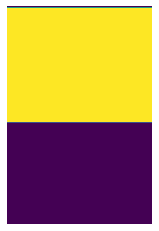

In [138]:
plt.axis('off')
plt.imshow(result)